# 08-02: Molloy-Reed Criterion

*December 7th 2022*  

We calculate the Molloy-Reed criterio and show how we can use it to predict the emergence of a giant connected component.

In [1]:
import pathpy as pp
import numpy as np

from collections import Counter

from tqdm import tqdm_notebook as tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from constants import ROOT_DIR

plt.style.use('default')
sns.set_style("whitegrid")

In the lecture, we have seen that we can use generating functions to analytically predict the critical point at which the size of the largest connected component changes drastically. The critical point is given by the model parameters at which the ratio between the second and the first raw moment assumes a value of two. Let us plot the evolution of the Molloy-Reed criterion for the values above. This allows us to recover the critical points in the plot above without performing any simulation.

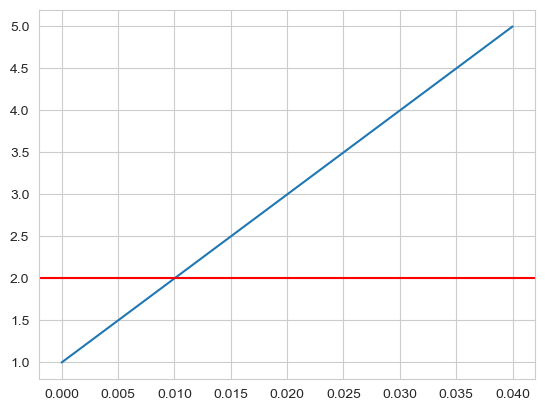

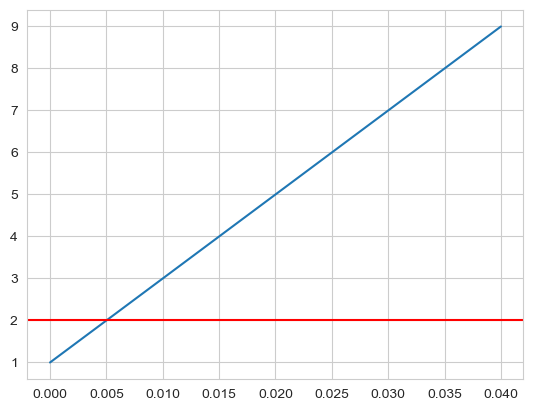

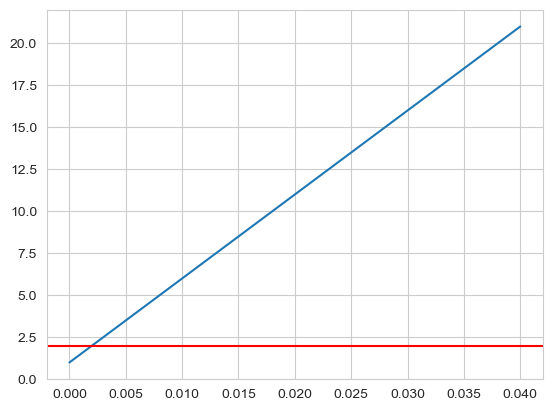

In [2]:
def plot_MR_criterion(n, p_range):
    mr = []
    for p in p_range:
        mr.append(1+n*p)
    plt.plot(p_range, mr)
    plt.axhline(2, color='red')
    plt.show() 

p_range = np.linspace(0, 0.04, num=20)

plot_MR_criterion(100, p_range)
plot_MR_criterion(200, p_range)
plot_MR_criterion(500, p_range)

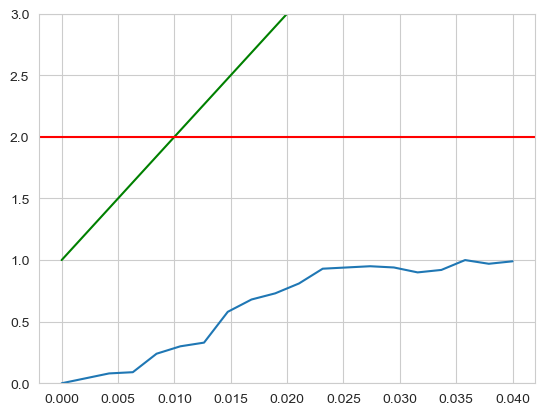

In [10]:
def plot_phase_transition(n, p_range, samples=1):
    lcc_sizes = []
    mr = []
    for p in tqdm(p_range, 'Running simulations'):
        tot = 0
        for i in range(samples):
            network = pp.generators.random_graphs.ER_np(n, p)
            size = tot + pp.algorithms.components.largest_component_size(network)
        lcc_sizes.append(size/n)
        mr.append(1+n*p)
    plt.plot(p_range, mr, color='green')
    plt.axhline(2, color='red')
    plt.plot(p_range, lcc_sizes)
    plt.ylim(0, 3)
    plt.show()

p_range = np.linspace(0, 0.04, num=20)
plot_phase_transition(100, p_range, samples=40)

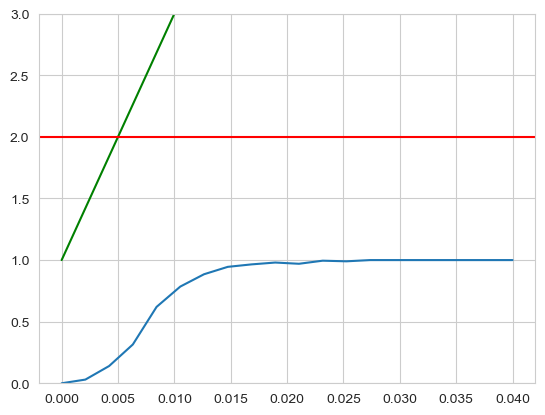

In [9]:
plot_phase_transition(200, p_range, samples=20)

In [ ]:
plot_phase_transition(500, p_range, samples=20)

Above, we plotted the Molloy-Reed criterion based on the analytical raw moments of the Poisson distribution. We can also implement a function that calculates the "empirical" Molloy Reed criterion based on the raw moments of a given degree sequence of a network.

In [11]:
def MR_criterion(network):
    k_2 = pp.statistics.degree_raw_moment(network, k=2)
    k_1 = pp.statistics.degree_raw_moment(network, k=1)
    mr = k_2/k_1    
    if mr > 2:
        print("giant connected component expected")
    else:
        print("giant connected component not expected") 
    print('<k^2>/<k> = ', mr)
    components = pp.algorithms.find_connected_components(network)
    component_sizes = [len(nodes) for comp, nodes in components.items() ]
    print('<s> = ', np.mean(component_sizes))

In [12]:
n = pp.generators.random_graphs.ER_np(1000, 0.0005)
MR_criterion(n)

giant connected component not expected
<k^2>/<k> =  1.4501992031872508
<s> =  1.335113484646195


In [13]:
n = pp.generators.random_graphs.ER_np(1000, 0.002)
MR_criterion(n)

giant connected component expected
<k^2>/<k> =  2.998019801980198
<s> =  6.25


In [16]:
n_gentoo = pp.io.sql.read_network(f'{ROOT_DIR}/data/networks.db', sql='SELECT DISTINCT source, target from gentoo', directed=False)
MR_criterion(n_gentoo)

giant connected component expected
<k^2>/<k> =  59.842105263157784
<s> =  403.0


In [18]:
n_lotr = pp.io.sql.read_network(f'{ROOT_DIR}/data/networks.db', sql='SELECT DISTINCT source, target from lotr',directed=False)
MR_criterion(n_lotr)

[12-14 19:11:41: WARNING] 67 edges existed already and were not be considered. To capture those edges, consider creating a multiedge and/or directed network.


giant connected component expected
<k^2>/<k> =  19.40220820189274
<s> =  46.333333333333336


In [19]:
n_highschool = pp.io.sql.read_network(f'{ROOT_DIR}/data/networks.db', sql='SELECT DISTINCT source, target from highschool',directed=False)
MR_criterion(n_highschool)

[12-14 19:11:48: WARNING] 154 edges existed already and were not be considered. To capture those edges, consider creating a multiedge and/or directed network.


giant connected component expected
<k^2>/<k> =  6.772988505747125
<s> =  120.0
